# Introduction

The SIR [model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) is a compartmental model that divides the population into susceptible, infectious, and recovered groups. Given an initial population
distribution, it models the evolution of the number of people in each compartment over time.

\begin{equation*}
\large Susceptible\xrightarrow{\beta}Infectious\xrightarrow{\gamma}Recovered
\end{equation*}

where $\beta$ is the transmission rate and $\gamma$ is the recovery rate. Both are rates and therefore have units expressed in per unit time. The SIR model may be expressed as

\begin{equation*}
s(t) + i(t) + r(t) = 1
\end{equation*}

\begin{equation*}
\frac{ds}{dt} + \frac{di}{dt} +\frac{dr}{dt} = 0
\end{equation*}

\begin{aligned}
{\frac {ds}{dt}} & =-\beta si,\\
{\frac {di}{dt}} & = \beta si - \gamma i,\\
{\frac {dr}{dt}} & = \gamma i,
\end{aligned}

Where $s$, $i$, and $r$ represent the percentage of the population in the susceptible, infectious and recovered groups respectively. The only remaining dimensional quantity in the equations is time. 

The are two natural time scales with which to scale the time variable, namely the transmission rate $\beta$ and the recovery rate $\gamma$. The cases of practical interest occur when the transmission rate is larger than the recovery rate since this results in rapid increases in the infectious population. We will now scale time using the tramsmission rate $\beta$. Dividing through our previous equations by $\beta$ and introducing $\tau=\beta t$ as our
dimensionless time parameter yields

\begin{equation*}
s(\tau) + i(\tau) + r(\tau) = 1
\end{equation*}

\begin{equation*}
\frac{ds}{d\tau} + \frac{di}{d\tau} +\frac{dr}{d\tau} = 0
\end{equation*}

\begin{aligned}
{\frac {ds}{d\tau}} & = -si,\\
{\frac {di}{d\tau}} & = si - \frac{i}{R_0} =i \left( s - \frac{1}{R_0} \right) ,\\
{\frac {dr}{d\tau}} & = \frac{i}{R_0} ,
\end{aligned}

where we have introduced $R_0 = \beta/\gamma $ as the [basic reproduction ratio](https://en.wikipedia.org/wiki/Basic_reproduction_number) which is the ratio of the transmission rate to the recovery rate. $R_0$ can be thought of as the average number of secondary cases arising from an average primary case in an entirely susceptible population. If $R_0$ is greater than 1 it means that the rate of infection may instantaneously outpace the rate of recovery resulting in an outbreak. We now have the SIR model with a single parameter, $R_0$. 

# The SI Model

As $R_0 \rightarrow \infty$, there is no recovery so $r=0$ and $dr/dt=0$. This is the zombie model
(think World War Z or The Walking Dead). Alternatively, this model might describe meme transmission. Intially, only a
few people on reddit are spreading the meme but eventually everybody is repeating it.
The SIR model reduces to the SI model, viz.

\begin{equation*}
s(\tau) + i(\tau) = 1
\end{equation*}

\begin{equation*}
\frac{ds}{d\tau} + \frac{di}{d\tau} = 0
\end{equation*}

\begin{aligned}
{\frac {ds}{d\tau}} & = -si,\\
{\frac {di}{d\tau}} & =  si,
\end{aligned}

If we substitute $i = 1 - s$ into the equation for $di/d\tau$ we get

\begin{equation*}
\frac{di}{d\tau} = i (1-i)
\end{equation*}

Some may recognize this as the [logistic differential equation](https://brilliant.org/wiki/logistic-differential-equations/) whose solution is the logistic function, namely:

\begin{equation*}
i(\tau) = \frac{i_0}{i_0 + s_0 e^{-\tau}}
\end{equation*}

where $i_0$ and $s_0$ are the values of $s$ and $i$ at $\tau=0$. The logistic function is an example of a sigmoid curve and has applications in neural networks as an activation function among others. When $\tau=0$, $e^{-\tau}=1$ and $i(0)=i_0$ (remember that $s_0 + i_0 = 1$). As $\tau \rightarrow \infty$, $e^{-\tau} \rightarrow 0$ and $i(\tau) \rightarrow 1$. Finally, note that as $\tau \rightarrow -\infty$, $i \rightarrow 0$. Let's plot the solution:

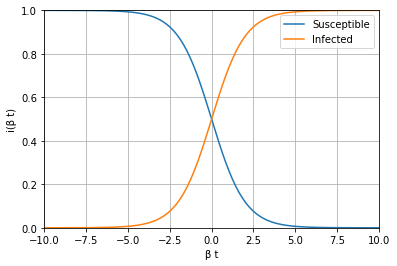

In [1]:
import matplotlib.pyplot as plt
import numpy as np

i_0 = 0.5
s_0 = 1 - i_0
betat = np.linspace(-10, 10, 200)
plt.plot(betat, 1 - i_0 / (i_0 + s_0 * np.exp(-betat)), label='Susceptible')
plt.plot(betat, 0 + i_0 / (i_0 + s_0 * np.exp(-betat)), label='Infected')
plt.xlabel('\u03B2 t')
plt.ylabel('i(\u03B2 t)')
plt.xlim((-10,10))
plt.ylim((0,1))
plt.grid()
plt.legend()
plt.show()

The plot above shows $i$ as a function of $\beta t$ for $i_0 = 0.5$. The shape of the plot is the same for any value of $i_0$: it simply shifts the curve from left to right. Also note that we never needed to specify $\beta$ because $i$ is expressed in terms of $\beta t$. It is interesting to note that $\beta t$ is dimensionless since both $t$ and $1/\beta$ have units of time. This observation will be useful when we revisit the SIR model. 

# The SIS Model

The common cold and influenza are examples of infections that do not give immunity upon recovery from infection. Rather than recovering, infectious individuals become susceptible again, viz.

\begin{equation*}
\large Susceptible\xrightarrow{\beta}Infectious\xrightarrow{\gamma}Susceptible
\end{equation*}

Note that the susceptible compartment now decreases as indivuals become infected and increases as they recover. This differs from the SIR model where the susceptible compartment may never increase. The SIS model in dimensionless form is:

\begin{equation*}
s(\tau) + i(\tau) = 1
\end{equation*}

\begin{equation*}
\frac{ds}{d\tau} + \frac{di}{d\tau} = 0
\end{equation*}

\begin{aligned}
{\frac {ds}{d\tau}} & = -is + \frac{i}{R_0} = -i \left(s - \frac{1}{R_0} \right) ,\\
{\frac {di}{d\tau}} & =  is - \frac{i}{R_0} =  i \left(s - \frac{1}{R_0} \right),
\end{aligned}

If we substitue $s = 1 - i$ into the equation for $di/d\tau$ we get

\begin{equation*}
\frac{di}{d\tau} = i \left(1 - \frac{1}{R_0} - i \right) = i (i_\infty - i)
\end{equation*}

where $i_\infty$ is a constant that depends only on $R_0$, namely:

\begin{equation*}
i_\infty = 1 - \frac{1}{R_0}
\end{equation*}

This is once again the [logistic differential equation](https://brilliant.org/wiki/logistic-differential-equations/)
that we encountered with the SI model but with different coefficients. The solution for the SIS model is:

\begin{equation*}
i(\tau) = \frac{i_0 i_\infty}{i_0 + (i_\infty - i_0) e^{- i_\infty \tau}} 
\end{equation*}

where $i_0$ is the value of $i$ at $\tau=0$. When $t=0$, $e^{- i_\infty \tau}=1$ and we can confirm that $i(0)=i_0$. As $t \rightarrow \infty$, the behavior of the solution depends on the value of $R_0$. When $R_0 < 1$, $e^{- i_\infty \tau} \rightarrow \infty$ and $i(t) \rightarrow 0$. When $R_0 = 1$, $e^{- i_\infty \tau} = 1$ and $i(t) = i_0$, remaining constant. This is the balancing point where the number of infectious individuals does not increase or decrease. Finally, when $R_0 > 1$, $e^{- i_\infty \tau} \rightarrow 0$ and $i(t) \rightarrow i_\infty$. 

When the transmission rate is very high relative to the recovery rate, $R_0$ become large. As $R_0 \rightarrow \infty$, $i_\infty \rightarrow 1$ and the SIS model reduces to the SI model, viz.

\begin{equation*}
i(\tau) = \frac{i_0}{i_0 + (1 - i_0) e^{-\tau}} = \frac{i_0}{i_0 + s_0 e^{-\tau}}
\end{equation*}

Let's visualize these results for the SIS model. First, we will plot $i$ and $s$ as a function of $\tau$ for $R_0 = 2.5$.

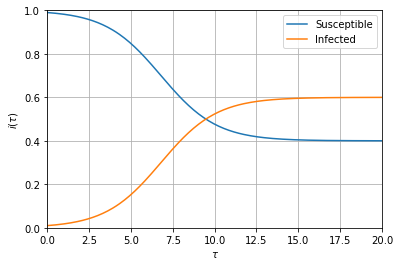

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def sis_model_infectious(tau, i_0, R_0):
    i_infty = 1.0 - (1.0 / R_0)
    exponent = - i_infty * tau
    
    return i_0 * i_infty / (i_0 + (i_infty - i_0) * np.exp(exponent))


i_0 = 0.01
s_0 = 1 - i_0
R_0 = 2.5
t_initial = 0
t_final = 20
tau = np.linspace(t_initial, t_final, 200)
plt.plot(tau, 1 - sis_model_infectious(tau, i_0, R_0), label='Susceptible')
plt.plot(tau, 0 + sis_model_infectious(tau, i_0, R_0), label='Infected')
plt.xlabel(r"$\tau$")
plt.ylabel(r"$i(\tau)$")
plt.xlim((t_initial,t_final))
plt.ylim((0,1))
plt.grid()
plt.legend()
plt.show()


Second, we will plot the endemic steady state $i_\infty$ as a function of $R_0$, viz:

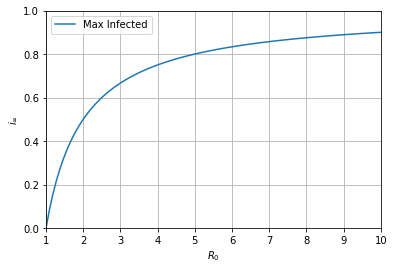

In [3]:
import matplotlib.pyplot as plt
import numpy as np

R_0 = np.linspace(1, 10, 100)
plt.plot(R_0, 1 - 1/R_0, label='Max Infected')
plt.xlabel(r"$R_0$")
plt.ylabel(r"$i_\infty$")
plt.xlim((1,10))
plt.ylim((0,1))
plt.grid()
plt.legend()
plt.show()

To be clear, when the model reaches an endemic steady state it does not mean that there are no longer new infections. Rather it means that for every new infection introduced another infection subsides. What can be observed in the plot above is that the endemic population is highly sensitive to $R_0$. When $R_0$ is between one and two, small changes in $R_0$ result in large increases in the endemic steady state. 

# The SIS Model: Phase Portrait

If our goal is only to determine the stable solutions of the SI and SIS models, we don't even need to solve the differential equations. Note that $ds/d\tau$ and $di/d\tau$ do not depend explicitly on time. In mathematics, a system of differential equations that does not depend explicitly on time is called an autonomous or time-invariant system. For time-invariant systems it is possible to plot $di/dt$ versus $s$ and $i$. This is called a phase portrait and will give us a insight into the stable solutions for our system. For the SIS model, $di/d\tau$ is

\begin{equation*}
\frac{di}{d\tau} = i\left(i_\infty -i \right)
\end{equation*}

which is a function only of $i$ (remembering that $i_\infty$ only depends upon the constant $R_0$). In phase space, for $R_0 > 1$, $di/d\tau$ is a parabola with two zeros, namely when $i=0$ and when $i=i_\infty$. These fixed points may be either stable or unstable and $i=0$ is unstable. The stable solution occurs when $i=i_\infty$. Note that in the phase portrait time does not appear at all. It simply tells us what the stable solutions for the model are. Below is the phase portrait for the SIS model for various values of $R_0$ including $R_0 \rightarrow \infty$ which corresponds to the SI model.

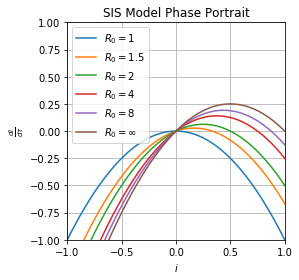

In [4]:
import matplotlib.pyplot as plt
import numpy as np

i = np.linspace(-2, 2, 101)

for R_0 in [1, 1.5, 2, 4, 8]:
    plt.plot(i, (1-1/R_0)*i - i*i, label=r"$R_0=%s$" % R_0)

plt.plot(i, i - i*i, label=r"$R_0=\infty$")

plt.title('SIS Model Phase Portrait')
plt.xlabel(r"$i$")
plt.ylabel(r"$\frac{di}{d\tau}$")
plt.axis('square')
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.grid()
plt.legend()
plt.show()